This notebook creates a single visualization showing all of the results from the BWM paper in one "view" so to speak

It first generates just the left sided areas. The user explodes them, and then it captures a screenshot.

Then using the same point of view, it plots all of the major results

In [1]:
import pandas as pd
import oursin as urchin
import matplotlib.pyplot as plt
import numpy as np

In [2]:
urchin.setup()

(URN) connected to server
Login sent with ID: root


In [3]:
ds_block_prior = pd.read_csv('./data/block_prior_paper.csv')

In [4]:
ds_block_prior.drop(ds_block_prior[ds_block_prior.region=='root'].index, inplace=True)
ds_block_prior.drop(ds_block_prior[ds_block_prior.region=='void'].index, inplace=True)

In [5]:
ds_stim = pd.read_parquet('./data/stimulus_bwm.pqt')
ds_choice = pd.read_parquet('./data/choice_bwm.pqt')
ds_feedback = pd.read_parquet('./data/feedback_bwm.pqt')
ds_wheel_spd = pd.read_parquet('./data/wheel_speed_bwm.pqt')
ds_block = pd.read_parquet('./data/block_bwm.pqt')

In [6]:
ds_block_prior

,region,R2_test,corrected_R2_test,fisher_p_value,significant
0,ACAd,0.037425,0.028904,0.016465,True
1,ACAv,0.012078,0.003473,0.488579,False
2,ACB,0.001825,0.008099,0.154024,False
3,AId,0.060093,0.044334,0.001808,True
4,AIp,0.046470,0.036076,0.018729,True
...,...,...,...,...,...
154,VPL,0.046896,0.048411,0.000701,True
155,VPLpc,-0.005506,0.001643,0.390000,False
156,VPM,0.026535,0.025123,0.001464,True
157,VeCB,-0.006016,-0.002951,0.750000,False


In [7]:
# before doing anything, load all the areas in their default colors and render
# this way we can make a picture w/ just the regions (and put labels on them)
area_vis = {}

for i, row in ds_block_prior.iterrows():
    aname = row.region + '-lh'
    area_vis[aname] = True

urchin.ccf.set_visibility(area_vis)

In [8]:
# before doing anything, load all the areas in their default colors and render
# this way we can make a picture w/ just the regions (and put labels on them)
# area_vis = {}

# for i, row in ds_stim.iterrows():
#     aname = row.acronym_b + '-lh'
#     area_vis[aname] = True

# urchin.ccf.set_visibility(area_vis)

In [9]:
# change cerebellum area colors
cerebellum_areas = ['CENT2','CUL4 5','SIM','ANcr1','PFL','ANcr2','DEC','FOTU','PRM','COPY','UVU','NOD','FN','CENT3','PYR']
area_colors = {}

for area in cerebellum_areas:
    area_colors[area] = '#BAB86C'

urchin.ccf.set_color(area_colors)

In [10]:
urchin.camera.set_rotation(35,0,135)
# manually set zoom to 11.5

In [11]:
urchin.camera.capture_image('./imgs/default_exploded.png')

(Camera receive meta) 2
(Camera) received 1000000 bytes
(Camera) received 150565 bytes
(Camera received all data)


In [12]:
def rgb2hex(rgba):
    r, g, b, a = rgba
    r = int(r * 255)
    g = int(g * 255)
    b = int(b * 255)
    hex_code = "#{:02x}{:02x}{:02x}".format(r, g, b)
    return hex_code

def stim_color(v, cmap, min_val, max_val):
    return rgb2hex(cmap((v - min_val) / (max_val - min_val)))

min_val = 0

In [35]:
# set all areas to white
area_colors = {}

for i, row in ds_block_prior.iterrows():
    aname = row.region + '-lh'
    area_colors[aname] = '#ffffff'

urchin.ccf.set_color(area_colors)

In [37]:
# get the colormap (greens)
sig_idxs = np.argwhere(ds_stim.decoding_significant.values == True)
min_val = np.min(ds_stim.decoding_effect.values[sig_idxs])
max_val = np.max(ds_stim.decoding_effect.values[sig_idxs])
print(min_val, max_val)
cmap = plt.get_cmap('YlGn')

area_vis = {}
area_color = {}

for i, row in ds_stim.iterrows():
    aname = row.acronym_b + '-lh'
    area_vis[aname] = True
    if row.decoding_significant:
        area_color[aname] = stim_color(row.decoding_effect, cmap, min_val, max_val)
    else:
        area_color[aname] = '#ffffff'

urchin.ccf.set_visibility(area_vis)
urchin.ccf.set_color(area_color)

urchin.camera.capture_image('./imgs/stimulus.png')

0.0239132220864338 0.1630948692226433


(Camera receive meta) 1
(Camera) received 916892 bytes
(Camera received all data)


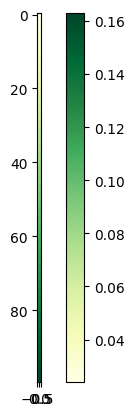

In [56]:
arr = np.linspace(min_val,max_val,100)
arr = np.expand_dims(arr,1)
plt.imshow(arr, cmap=cmap)
plt.colorbar()

plt.savefig('./imgs/stimulus_colorbar.png')

In [57]:
# get the colormap (greens)
sig_idxs = np.argwhere(ds_choice.decoding_significant.values == True)
min_val = np.min(ds_choice.decoding_effect.values[sig_idxs])
max_val = np.max(ds_choice.decoding_effect.values[sig_idxs])
cmap = plt.get_cmap('YlOrRd')

area_vis = {}
area_color = {}

for i, row in ds_choice.iterrows():
    aname = row.acronym_b + '-lh'
    area_vis[aname] = True
    if row.decoding_significant:
        area_color[aname] = stim_color(row.decoding_effect, cmap, min_val, max_val)
    else:
        area_color[aname] = '#ffffff'

urchin.ccf.set_visibility(area_vis)
urchin.ccf.set_color(area_color)

urchin.camera.capture_image('./imgs/choice.png')

(Camera receive meta) 2
(Camera) received 1000000 bytes
(Camera) received 32502 bytes
(Camera received all data)


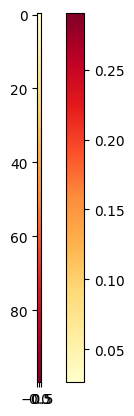

In [58]:
arr = np.linspace(min_val,max_val,100)
arr = np.expand_dims(arr,1)
plt.imshow(arr, cmap=cmap)
plt.colorbar()

plt.savefig('./imgs/choice_colorbar.png')

In [59]:
# get the colormap (greens)
sig_idxs = np.argwhere(ds_feedback.decoding_significant.values == True)
min_val = np.min(ds_feedback.decoding_effect.values[sig_idxs])
max_val = np.max(ds_feedback.decoding_effect.values[sig_idxs])
cmap = plt.get_cmap('Reds')

area_vis = {}
area_color = {}

for i, row in ds_feedback.iterrows():
    aname = row.acronym_b + '-lh'
    area_vis[aname] = True
    if row.decoding_significant:
        area_color[aname] = stim_color(row.decoding_effect, cmap, min_val, max_val)
    else:
        area_color[aname] = '#ffffff'

urchin.ccf.set_visibility(area_vis)
urchin.ccf.set_color(area_color)

urchin.camera.capture_image('./imgs/feedback.png')

(Camera receive meta) 2
(Camera) received 1000000 bytes
(Camera) received 101165 bytes
(Camera received all data)


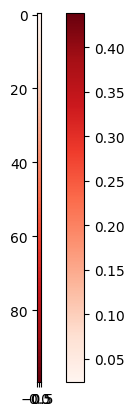

In [60]:
arr = np.linspace(min_val,max_val,100)
arr = np.expand_dims(arr,1)
plt.imshow(arr, cmap=cmap)
plt.colorbar()

plt.savefig('./imgs/feedback_colorbar.png')

In [61]:
# get the colormap (greens)
sig_idxs = np.argwhere(ds_block.decoding_significant.values == True)
min_val = 0
max_val = 0.12
cmap = plt.get_cmap('Purples')

area_vis = {}
area_color = {}

for i, row in ds_block.iterrows():
    aname = row.acronym_b + '-lh'
    area_vis[aname] = True
    if row.decoding_significant:
        area_color[aname] = stim_color(row.decoding_effect, cmap, min_val, max_val)
    else:
        area_color[aname] = '#ffffff'

urchin.ccf.set_visibility(area_vis)
urchin.ccf.set_color(area_color)

urchin.camera.capture_image('./imgs/block.png')

(Camera receive meta) 1


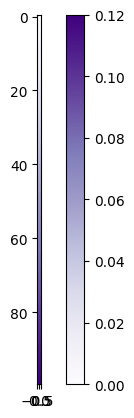

(Camera) received 889877 bytes
(Camera received all data)


In [62]:
arr = np.linspace(min_val,max_val,100)
arr = np.expand_dims(arr,1)
plt.imshow(arr, cmap=cmap)
plt.colorbar()

plt.savefig('./imgs/block_colorbar.png')

In [63]:
# get the colormap (greens)
sig_idxs = np.argwhere(ds_wheel_spd.decoding_significant.values == True)
min_val = np.min(ds_wheel_spd.decoding_effect.values[sig_idxs])
max_val = np.max(ds_wheel_spd.decoding_effect.values[sig_idxs])
cmap = plt.get_cmap('Blues')

area_vis = {}
area_color = {}

for i, row in ds_wheel_spd.iterrows():
    aname = row.acronym_b + '-lh'
    area_vis[aname] = True
    if row.decoding_significant:
        area_color[aname] = stim_color(row.decoding_effect, cmap, min_val, max_val)
    else:
        area_color[aname] = '#ffffff'

urchin.ccf.set_visibility(area_vis)
urchin.ccf.set_color(area_color)

urchin.camera.capture_image('./imgs/wheel_spd.png')

(Camera receive meta) 2
(Camera) received 1000000 bytes
(Camera) received 56441 bytes


(Camera received all data)


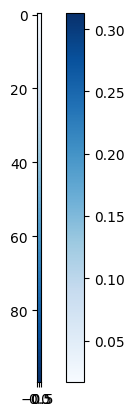

In [64]:
arr = np.linspace(min_val,max_val,100)
arr = np.expand_dims(arr,1)
plt.imshow(arr, cmap=cmap)
plt.colorbar()

plt.savefig('./imgs/wheel_colorbar.png')

In [65]:
# get the colormap (greens)
sig_idxs = np.argwhere(ds_block.decoding_significant.values == True)
min_val = 0
max_val = 0.12
cmap = plt.get_cmap('Purples')

area_vis = {}
area_color = {}

for i, row in ds_block_prior.iterrows():
    aname = row.region + '-lh'
    area_vis[aname] = True
    if row.significant:
        area_color[aname] = stim_color(row.corrected_R2_test, cmap, min_val, max_val)
    else:
        area_color[aname] = '#ffffff'

urchin.ccf.set_visibility(area_vis)
urchin.ccf.set_color(area_color)

urchin.camera.capture_image('./imgs/block_prior.png')

(Camera receive meta) 1


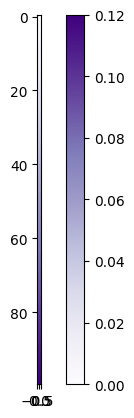

(Camera) received 985262 bytes
(Camera received all data)


In [66]:
arr = np.linspace(min_val,max_val,100)
arr = np.expand_dims(arr,1)
plt.imshow(arr, cmap=cmap)
plt.colorbar()

plt.savefig('./imgs/block_prior_colorbar.png')

# Viridis colormap

In [89]:
# set all areas to white
area_colors = {}

for i, row in ds_block_prior.iterrows():
    aname = row.region + '-lh'
    area_colors[aname] = '#ffffff'

urchin.ccf.set_color(area_colors)

In [77]:
# set colormap
# get the colormap (greens)
min_val = 0
max_val = 0.4389912311053731
print(min_val, max_val)
cmap = plt.get_cmap('plasma')

0 0.4389912311053731


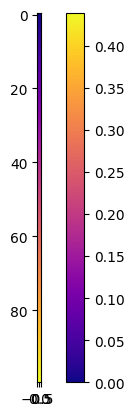

In [78]:
arr = np.linspace(min_val,max_val,100)
arr = np.expand_dims(arr,1)
plt.imshow(arr, cmap=cmap)
plt.colorbar()

plt.savefig('./imgs/uniform_colormap.png')

In [90]:

area_vis = {}
area_color = {}

for i, row in ds_stim.iterrows():
    aname = row.acronym_b + '-lh'
    area_vis[aname] = True
    if row.decoding_significant:
        area_color[aname] = stim_color(row.decoding_effect, cmap, min_val, max_val)
    else:
        area_color[aname] = '#ffffff'

urchin.ccf.set_visibility(area_vis)
urchin.ccf.set_color(area_color)

urchin.camera.capture_image('./imgs/stimulus_uniform.png')

(Camera receive meta) 1
(Camera) received 915809 bytes
(Camera received all data)


In [91]:

area_vis = {}
area_color = {}

for i, row in ds_choice.iterrows():
    aname = row.acronym_b + '-lh'
    area_vis[aname] = True
    if row.decoding_significant:
        area_color[aname] = stim_color(row.decoding_effect, cmap, min_val, max_val)
    else:
        area_color[aname] = '#ffffff'

urchin.ccf.set_visibility(area_vis)
urchin.ccf.set_color(area_color)

urchin.camera.capture_image('./imgs/choice_uniform.png')

(Camera receive meta) 2
(Camera) received 1000000 bytes
(Camera) received 30741 bytes
(Camera received all data)


In [92]:

area_vis = {}
area_color = {}

for i, row in ds_feedback.iterrows():
    aname = row.acronym_b + '-lh'
    area_vis[aname] = True
    if row.decoding_significant:
        area_color[aname] = stim_color(row.decoding_effect, cmap, min_val, max_val)
    else:
        area_color[aname] = '#ffffff'

urchin.ccf.set_visibility(area_vis)
urchin.ccf.set_color(area_color)

urchin.camera.capture_image('./imgs/feedback_uniform.png')

(Camera receive meta) 2
(Camera) received 1000000 bytes
(Camera) received 115538 bytes
(Camera received all data)


In [93]:

area_vis = {}
area_color = {}

for i, row in ds_block.iterrows():
    aname = row.acronym_b + '-lh'
    area_vis[aname] = True
    if row.decoding_significant:
        area_color[aname] = stim_color(row.decoding_effect, cmap, min_val, max_val)
    else:
        area_color[aname] = '#ffffff'

urchin.ccf.set_visibility(area_vis)
urchin.ccf.set_color(area_color)

urchin.camera.capture_image('./imgs/block_uniform.png')

(Camera receive meta) 1
(Camera) received 888914 bytes
(Camera received all data)


In [94]:

area_vis = {}
area_color = {}

for i, row in ds_wheel_spd.iterrows():
    aname = row.acronym_b + '-lh'
    area_vis[aname] = True
    if row.decoding_significant:
        area_color[aname] = stim_color(row.decoding_effect, cmap, min_val, max_val)
    else:
        area_color[aname] = '#ffffff'

urchin.ccf.set_visibility(area_vis)
urchin.ccf.set_color(area_color)

urchin.camera.capture_image('./imgs/wheel_spd_uniform.png')

(Camera receive meta) 2
(Camera) received 1000000 bytes
(Camera) received 65769 bytes
(Camera received all data)


In [95]:

area_vis = {}
area_color = {}

for i, row in ds_block_prior.iterrows():
    aname = row.region + '-lh'
    area_vis[aname] = True
    if row.significant:
        area_color[aname] = stim_color(row.corrected_R2_test, cmap, min_val, max_val)
    else:
        area_color[aname] = '#ffffff'

urchin.ccf.set_visibility(area_vis)
urchin.ccf.set_color(area_color)

urchin.camera.capture_image('./imgs/block_prior_uniform.png')

(Camera receive meta) 1
(Camera) received 970599 bytes
(Camera received all data)
